# Analysis of nano-indentation data - Part 2

Following the general approach in part one, we now  look into a more advanced way how we can measure the hardness of the Martensite and ferrite phaase.


### Credit
Data and images are provided by M. Wollenweber (IMM/RWTH Aachen)

In [1]:
import pandas as pd
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

from tools import plot_dbscan

# for plotting
colour_scheme = 'gist_heat'
marker_size = 12
marker_type = 's'


# Loading data

In the next step, we load the indentation data and look at the quantities of interest



In [4]:
df = # your code here...
df.head(3)

x          y      load      depth      stiffness     modulus  \
index                                                                   
1      0.0  68.294250  0.999767  88.247395  106268.458800  190.653869   
2      0.0  67.579875  0.999758  95.026045  106864.372258  175.243633   
3      0.0  66.913125  0.999791  82.844008  105616.592448  204.800821   

       hardness  
index            
1      3.663756  
2      3.140350  
3      4.181861

The quantity m2h = Modulus $^2$ / Hardness is an empirical parameter that can be used to highlight the difference between the two phases.
We add this to our data-frame

In [5]:
df['m2h'] = # your code here ...
df.head(5)

x          y      load      depth      stiffness     modulus  \
index                                                                   
1      0.0  68.294250  0.999767  88.247395  106268.458800  190.653869   
2      0.0  67.579875  0.999758  95.026045  106864.372258  175.243633   
3      0.0  66.913125  0.999791  82.844008  105616.592448  204.800821   
4      0.0  66.198750  0.999881  59.343424   70601.627419  192.762570   
5      0.0  65.532000  0.999834  74.791846   94219.623185  203.170226   

       hardness           m2h  
index                          
1      3.663756   9921.210337  
2      3.140350   9779.271214  
3      4.181861  10029.835736  
4      8.456658   4393.864240  
5      5.185405   7960.446866

Using this data, we have previously created this following heatmap.

We can see the Martensite islands and bands, the ferrite phase, as well as some artefacts (almost black)

<div style="text-align:center"><img src="./img/martensite_ferrite_heatmap.png" style="width: 50%;" class="center"/></div>

# Phase Analysis

In the previous exercise we made use of the fact that we can either place a threshold on the hardness value to identify the Martensite and ferrite phase, or use a KMeans clustering approach using the hardness values. The latter approach resulted in the following result


<div style="text-align:center"><img src="./img/martensite_ferrite_kmeans.png" style="width: 50%;" class="center"/></div>



We tried to identify the artefacts as well, however, using the KMeans algorithm didn't help us. Instead, we could set another threshold.

While this worked, it would be _nice_ to be able to follow an approach that does not require us to tune thresholds manually, or involve separate steps for identifying artefacts, Martensite, and ferrite.
After all, when we (as humans) look at the heatmap, these regions are immediately "obvious" to us...

_```Exercise:```_ 

Discuss with your neighbours how you might approach the problem. Compared to what we have done so far, what is a key idea we may want to change?

_```Solution:```_

...

In [ ]:
##
## Your code here
## 

In [7]:
# we make a copy of our dataframe with only x,y,hardness to pass to the clustering algorithm

df_small = # your code here ...
df_small

x          y  hardness
index                                
1       0.000000  68.294250  3.663756
2       0.000000  67.579875  3.140350
3       0.000000  66.913125  4.181861
4       0.000000  66.198750  8.456658
5       0.000000  65.532000  5.185405
...          ...        ...       ...
9996   68.341875   2.714625  3.551456
9997   68.341875   2.047875  3.300934
9998   68.341875   1.333500  7.061848
9999   68.341875   0.666750  7.257154
10000  68.341875   0.000000  6.347033

[10000 rows x 3 columns]

In [1]:
db = #your code here ...
#db.fit(df_small)

In [ ]:
# plot results

# your code here

This worked quite well. The clustering algorithm has found the Martensite and ferrite phases by itself, as well as the artefacts (marked in black).

However, we have 23 clusters - let's see if we can improve on this by first normalising the input data-frame.

In [10]:
scaler = # your code here...
df_small_norm = scaler.fit_transform(df_small)

In [2]:
db = # your code here...

In [3]:
#plot results

# your code here

This is much better - we have fewer clusters and most of each phase is in one cluster.
The artefacts are shown in black which, in this visualisation, is marked as "noise". However, they are identified correctly.

In [4]:
# add the output of the clustering algorithm to the dataframe

# your code here

In [6]:
# plot the phases

# your code here

plt.title('Martensite / Ferrite phase')
plt.show()

In the next step, we want to find the individual Martensite islands in the sample (as well as the artefacts).
To this end, we use the clustering algorithm again, but now apply it to the clusters we have found in the previous steps.

First, the artefacts:

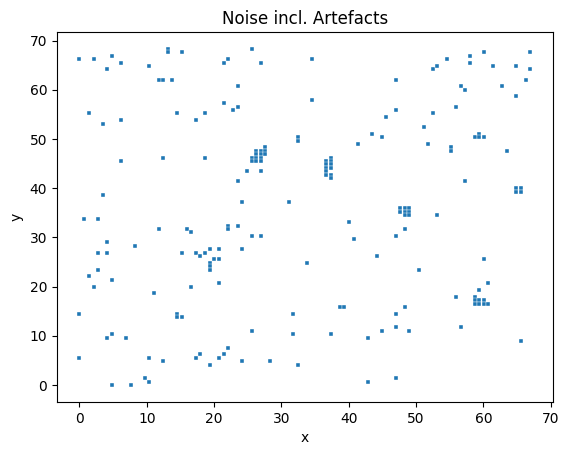

In [15]:
df_artefact = # your code here...

In [7]:
db_artefact= # your code here...


This will find all clusters for the artefacts

In [17]:
labels_artefacts = # your code here...
df_artefact['label_artefact'] = labels_artefacts

In [18]:
##
## merge information about hardness
##
df = df.join(df_artefact.drop(columns=['x','y']), on='index')

In [8]:
# plot results
# your code here

In [20]:
### calculate mean / std devation for the artefact clusters

# your code here

artefact cluster:  0
Mean hardness 1.60 ± 0.47 GPa
-----------------
artefact cluster:  1
Mean hardness 1.99 ± 0.33 GPa
-----------------
artefact cluster:  2
Mean hardness 1.19 ± 0.44 GPa
-----------------
artefact cluster:  3
Mean hardness 1.95 ± 0.33 GPa
-----------------


Now we do the same thing for the clusters in the Martensite phase

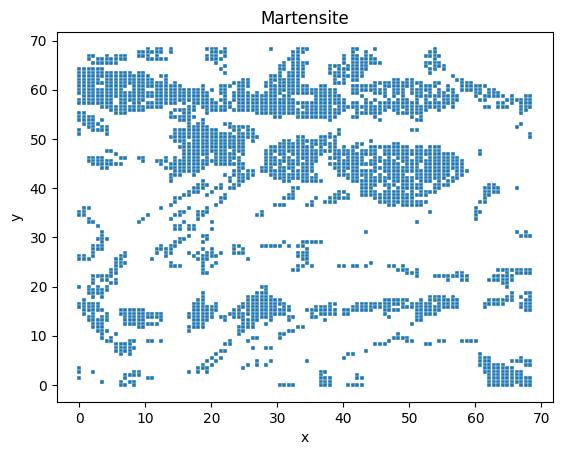

In [21]:
df_martensite = # your code here...

plt.title('Martensite')
plt.show()

In [22]:
db_martensite = # your code here...


In [23]:
##
## merge information about hardness
##
df_martensite['label_martensite'] = labels_martensite
df = df.join(df_martensite.drop(columns=['x','y']), on='index')

In [9]:
#plot results

# your code here

In [25]:
# calculate mean and std for each cluster
data = []

# your code here

In [26]:
df_martensite_hardness = pd.DataFrame(data, columns=['cluster','mean', 'std'])
df_martensite_hardness

cluster      mean       std
0         0  6.613344  0.583677
1         1  7.139957  0.649221
2         2  6.847230  0.664639
3         3  6.831127  0.663004
4         4  6.754991  0.665317
5         5  7.254465  0.530189
6         6  7.143410  0.604198
7         7  6.890000  0.639221
8         8  7.007588  0.721427
9         9  6.927718  0.799733
10       10  6.640829  0.564125
11       11  6.665684  0.742445
12       12  6.518431  0.769317
13       13  6.889571  0.523903
14       14  6.571647  0.651912
15       15  6.559863  0.889056
16       16  6.908097  0.745813
17       17  7.099943  0.708017
18       18  6.818742  0.580820
19       19  6.593863  0.625805
20       20  6.412463  0.837062
21       21  6.504372  0.638793
22       22  6.380368  0.597121
23       23  6.824434  0.599242
24       24  7.036380  0.768108
25       25  6.666141  0.889886
26       26  6.923856  0.694569
27       27  6.378589  0.593894
28       28  6.711307  0.907080
29       29  7.228262  0.676918
30       30  7.163716  0.684553
31       31  6.815076  0.682449
32       32  6.548690  0.472447
33       33  6.849322  0.656547
34       34  7.133541  0.544937
35       35  6.810304  0.766516
36       36  6.818283  0.476162
37       37  7.323110  0.435943

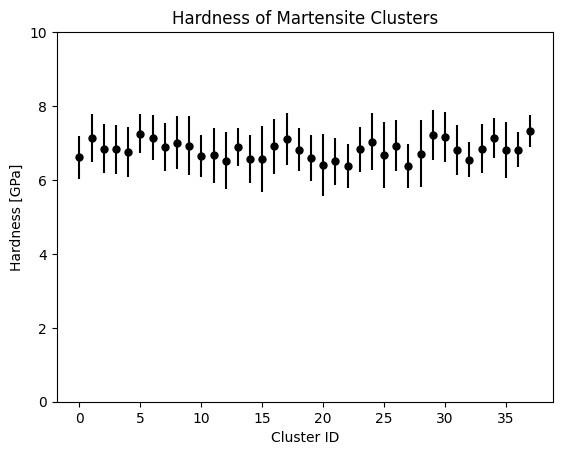

In [27]:
df_martensite_hardness.plot(
    x='cluster',
    y='mean',
    yerr = 'std',
    linestyle='none',
    capsize=0,
    color='black',
    legend=None,
    marker='o',
    markersize=5
)
plt.xlabel('Cluster ID') 
plt.ylabel('Hardness [GPa]') 
plt.ylim(0,10)
plt.title('Hardness of Martensite Clusters')
plt.show()